In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

In [ ]:
nome = '../../malhasMSH/unidimensional_100T_dif_py.msh'
#nome = '../../malhasMSH/unidimensional_4e_py.msh'

noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]
#noh_eletrodos = [0,  1, 2, 3, 4]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura2D = 0.001)
MinhaMalha1D.ReadMesh()


meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

sigma_inicial = np.full(MinhaMalha1D.NumberOfElements, 0.50)          # Monta vetor sigma inicia

amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui

fwd.Solve()

#plt.plot(fwd.Vmedido)
print(f'Vmedido \n {fwd.Vmedido.shape}')
nome_arquivo = 'unidimensional_100e_py'

N_padraoCC = 1

##fwd.criar_arquivo_pos_2D(N_padraoCC, fwd.Vmedido, nome_arquivo)
#fwd.criar_arquivo_pos_2D(fwd.Vmedido, nome_arquivo)

#fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)


V_measured = fwd.Vmedido_eletrodos
invProblem = inverseProblem.inverse_problem(MinhaMalha1D, Pcorrente=Pcorrente, debug=1)
invProblem.solve(sigma_inicial, V_measured)
#print('Y_jacobian',invProblem.Y_jacobian)

In [ ]:
invProblem.Y_Vcalc

## Testes com HUA

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

#nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'
#nome = '../../malhasMSH/Hua_quadrado_2e.msh'

MinhaMalha = mesh.HuaElectrodes2DMeshEdson(8, nome_msh=nome, altura2D = 0.02)
#MinhaMalha = mesh.HuaElectrodes2DMeshEdson(2, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 1.0,    
1001 : 1.0,
5001 : 1.0, 
5002 : 1.0, 
5003 : 1.0, 
5004 : 1.0, 
5005 : 1.0, 
5006 : 1.0, 
5007 : 1.0, 
5008 : 1.0,  
}

MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=3, VirtualNode = True)   # __init__ roda aqui


print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ8_anom4_tst_Hua_v4_1_lc_0_01'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

V_measured = fwd.Vmedido_eletrodos

print(f'V_mesured \n {V_measured}')


#invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalha, Pcorrente=fwd.corrente)
#invProblem_2D.solve(V_measured, initialEstimate=2.9,alpha =2.5,  Lambda = 0.50, max_iter=1,Tol=5.0e-4)
#print('Y_jacobian',invProblem.Y_jacobian)


# TESTE COM eletrodo pontual

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ16_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

# TESTE com eletrodo pontual mesh 4 elementos

## Regularização Filtro Gaussiano FP_Alta

fonte: Erick equação C.37

$$
\hat{\theta}_{k+1} = \hat{\theta}_k + \alpha_k
\left( J_k^T W_1 J_k + \lambda^2 L_2^T L_2 \right)^{-1}
\cdot \left( J_k^T W_1 (z - h(\hat{\theta}_k)) - \lambda^2 L_2^T L_2 (\hat{\theta}_k - \theta^*) \right)
$$
onde,
$$W_1=L_1^T L_1$$

In [ ]:
# %%time
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# TESTE COM eletrodo pontual mesh 4 elementos

###############################################################################
#nome = '../../malhasMSH/quatro_triangulos_03nov2025.msh'
#nome = '../../malhasMSH/circ16_base_plus.msh'
#nome = '../../malhasMSH/quadrado_16e.msh'
nome = '../../malhasMSH/quatro_4e_em_XY.msh'

#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 1.00)
MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto2.ReadMesh() 

#print(MinhaMalhaPto2.Elements[2])
#print(f"Centroid: {MinhaMalhaPto2.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaPto2.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial



meus_sigmas = {
1000 : 1.0,
1001 : 1.00}#,
#1002 : 2.00,    
#1003 : 2.00}

MinhaMalhaPto2.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto2.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaPto2.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=None, SkipPattern=1, I =1.0e-3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
#print(f'Pcorrente \n {fwd.corrente[:16]}')

#print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
#print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'ParaVernoGmshPto'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

#print(f'self.Yinversa \n {fwd.Yinversa}')

V_measured = fwd.Vmedido_eletrodos


In [1]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

nome = '../../malhasMSH/circ16_3_anomalia6.msh'

MinhaMalhaPto = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalhaPto.ReadMesh() 

print(MinhaMalhaPto.Elements[2])
print(f"Centroid: {MinhaMalhaPto.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalhaPto.Elements[2].KGeo}")

meus_sigmas = {
1000 : 0.1,    
1001 : 0.01,
1002 : 0.01,
1003 : 0.01,
10001 : 0.2,
10002 : 0.2, 
10003 : 0.2, 
10004 : 0.2, 
10005 : 0.2, 
10006 : 0.2, 
10007 : 0.2, 
10008 : 0.2, 
10008 : 0.2, 
10010 : 0.2, 
10011 : 0.2, 
10012 : 0.2, 
10013 : 0.2, 
10014 : 0.2, 
10015 : 0.2, 
10016 : 0.2,  
}

MinhaMalhaPto.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaPto.CalcKGlobal() # calculando KGlobal usando Sigmas


print(f'MinhaMalhaPto.KGlobal =  {MinhaMalhaPto.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto, Pcorrente=None, SkipPattern=3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
print(f'Pcorrente \n {fwd.corrente[:16]}')

print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'circ16_anomalia6'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

V_measured = fwd.Vmedido_eletrodos


msh_physical_groups found (type triangle): [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 10


msh_physical_groups found (type triangle): [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 10

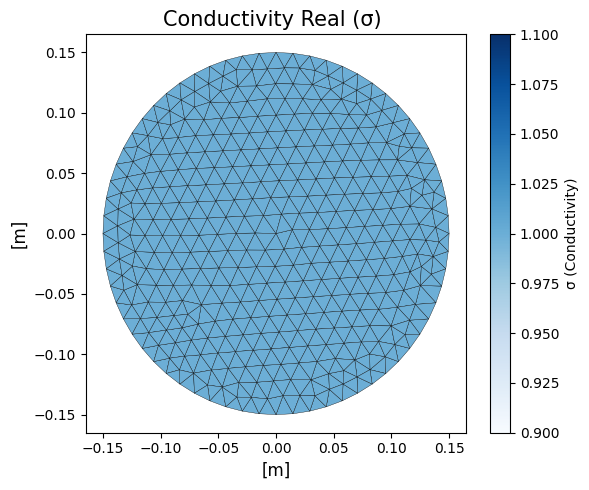

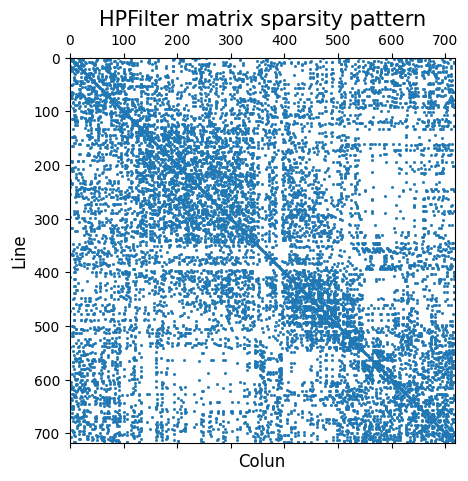

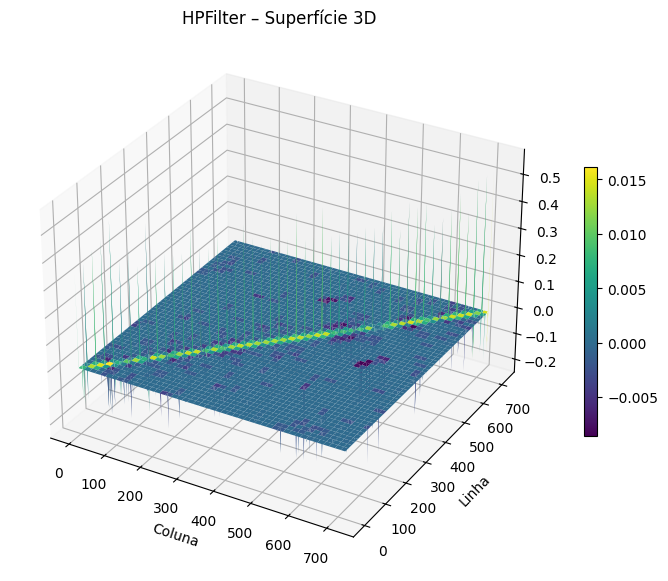

0.0018736306464087963 - 0.0008676227083402808 - 0
0.0018736301174278641 - 0.0008610180147305134 - 1
0.001873629595864695 - 0.0008544669611531594 - 2
0.0018736290817205434 - 0.0008479708370509808 - 3
0.0018736285749966488 - 0.0008415309643576652 - 4
0.0018736280756942291 - 0.0008351486871948217 - 5
0.00187362758381449 - 0.0008288253842932087 - 6
0.0018736270993586171 - 0.0008225624587157398 - 7
0.0018736266223277828 - 0.0008163613471026998 - 8
0.0018736261527231405 - 0.0008102235139211016 - 9
0.0018736256905458263 - 0.0008041504530226124 - 10
0.0018736252357969597 - 0.0007981436868299425 - 11
0.0018736247884776427 - 0.0007922047668176784 - 12
0.001873624348588962 - 0.0007863352738873216 - 13
0.0018736239161319863 - 0.0007805368182410063 - 14
0.001873623491107768 - 0.0007748110357171118 - 15
0.0018736230735173429 - 0.0007691595934757284 - 16
0.0018736226633617287 - 0.0007635841840599294 - 17
0.001873622260641926 - 0.0007580865262214728 - 18
0.0018736218653589184 - 0.0007526683632387761 -

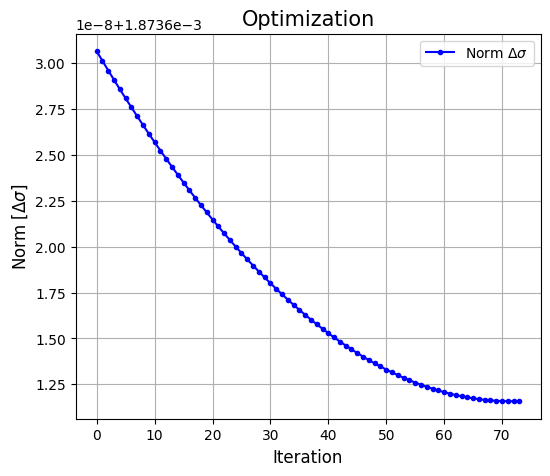

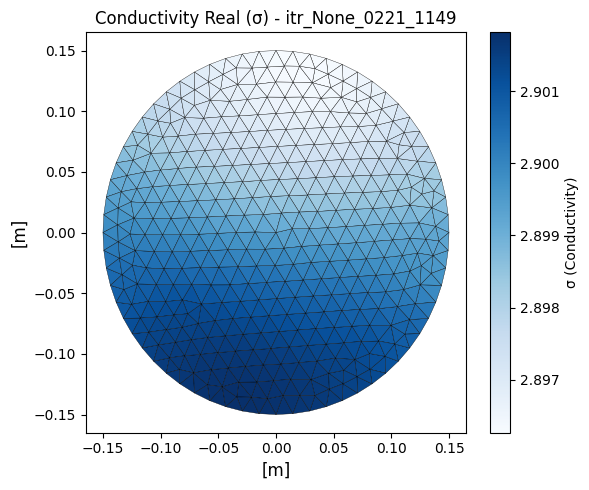

In [3]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt


nome = '../../malhasMSH/circ16_base_plus.msh'

MinhaMalhaBase16 = mesh.PointElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02)
MinhaMalhaBase16.ReadMesh() 

meus_sigmas = {1000 : 1.0}

MinhaMalhaBase16.SetSigmaPhysicaEntity(meus_sigmas)


MinhaMalhaBase16.CalcKGlobal() # calculando KGlobal usando Sigmas


#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaBase16.KGlobal.shape}')

fwd = forwardProblem.forward_problem(MinhaMalhaBase16, Pcorrente=None, SkipPattern=3, I =1.0e-3)   # __init__ roda aqui




#print(MinhaMalhaBase16.Elements[2])
#print(f"Centroid: {MinhaMalhaBase16.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaBase16.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial
#Pcorrente = np.loadtxt("padrao128CC_257b.txt")
#iteration= np.loadtxt("lastIteration.txt")
iteration =0
print(f'lastIteration {iteration}')


sigma_inicial_cont = np.loadtxt("sigma_inicial_cont.txt")
invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalhaBase16, Pcorrente=fwd.corrente)

#invProblem_2D.solve(V_measured,initialEstimate=2.9, alpha =0.010,  Lambda = 0.5, max_iter=2, Tol=1.0e-20, iteration=iteration)
invProblem_2D.solve(V_measured,initialEstimate=2.9, alpha =0.010,  Lambda = 1.0e-3, max_iter=200, Tol=1.0e-20, iteration=iteration)
#print('Y_jacobian',invProblem.Y_jacobian)


# TESTE ANISOTRÓPICO com eletrodo pontual 

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

# TESTE COM eletrodo pontual mesh 4 elementos

###############################################################################
#nome = '../../malhasMSH/quatro_triangulos_03nov2025.msh'
#nome = '../../malhasMSH/dezesseis_triangulos_22jan25.msh'
#nome = '../../malhasMSH/circ16_base_plus.msh'
nome = '../../malhasMSH/fantomaAnisotropia01.msh'
#nome = '../../malhasMSH/quadrado_16e.msh'
#nome = '../../malhasMSH/dezesseis_triangulos_1body.msh'
#nome = '../../malhasMSH/quadrado_16e_plus.msh'
#nome = '../../malhasMSH/quatro_4e_em_XY.msh'

#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 1.00)
MinhaMalhaPto2 = mesh.PointElectrodes2DMeshAnisotropic(4, nome_msh=nome, altura2D = 0.02, thetaAngle = 0.0, sigmaX = 10.0, sigmaY = 1.00)
#MinhaMalhaPto2 = mesh.PointElectrodes2DMeshEdson(4, nome_msh=nome, altura2D = 0.02, useEdson=True)

#inearTriangleAnisotropic
MinhaMalhaPto2.ReadMesh() 

#print(MinhaMalhaPto2.Elements[2])
#print(f"Centroid: {MinhaMalhaPto2.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalhaPto2.Elements[2].KGeo}")
#sigma_inicial = np.full(MinhaMalhaPto2.NumberOfElements, 1.0)          # Monta vetor sigma inicial


'''
meus_sigmas = {
1000 : 1.000}#,
#1001 : 10.00}#,
#1002 : 2.00,    
#1003 : 2.00}
'''
meus_sigmas = {
1000 : 1.0,
1001 : 1000.0,
10000 : 1.0e9,
10001 : 1.0e9,
10002 : 1.0e9,
10003 : 1.0e9, 
10004 : 1.0e9,     
}


#meus_sigmas= np.loadtxt("fantomaAnisotropiaSigma.txt")


MinhaMalhaPto2.SetSigmaPhysicaEntity(meus_sigmas)
#MinhaMalhaPto2.SetSigmaElements(meus_sigmas)

MinhaMalhaPto2.CalcKGlobal() # calculando KGlobal usando Sigmas

print('meus_sigmas',meus_sigmas)
#print(f'MinhaMalhaPto2.KGlobal =  {MinhaMalhaPto2.KGlobal}')

fwd = forwardProblem.forward_problem(MinhaMalhaPto2, Pcorrente=None, SkipPattern=1, I =1.0e-3)   # __init__ roda aqui

#print(f'Pcorrente \n {fwd.corrente[MinhaMalhaPto.NumberOfNodes-MinhaMalhaPto.NumberOfElectrodes: MinhaMalhaPto.NumberOfNodes]}')
#print(f'Pcorrente \n {fwd.corrente[:16]}')

#print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
#print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'ParaVernoGmshPto'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

#print(f'self.Yinversa \n {fwd.Yinversa}')

V_measured = fwd.Vmedido_eletrodos
#print('V_measured ',V_measured)
print('meus_sigmas ',meus_sigmas)

# TESTE ANISOTRÓPICO com eletrodo Hua

In [ ]:
import numpy as np
import mesh
import forwardProblem
import inverseProblem
import inverseProblem_2D
import matplotlib.pyplot as plt

#nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
#nome = '../../malhasMSH/circ8_anom4_tst_Hua_v4_1_lc_0_01.msh'
nome = '../../malhasMSH/circ8_anom4_tst_Hua_v2_2_lc_especial.msh'
#nome = '../../malhasMSH/circ8_anomZero_Hua.msh'
#nome = '../../malhasMSH/circ16_anomZero_Hua.msh'
#nome = '../../malhasMSH/circ16_anom1_Hua.msh'

#nome = '../../malhasMSH/Hua_quadrado_2e.msh'
#nome = '../../malhasMSH/circ4_anomZero_Hua.msh'
#nome = '../../malhasMSH/Hua_quadrado_4eletrodos_new.msh'
#nome = '../../malhasMSH/circ16_anom1_Square_Hua.msh'


#MinhaMalha = mesh.HuaElectrodes2DAnisotropic(16, nome_msh=nome, altura2D = 0.02, thetaAngle = 0.0, sigmaX = 1000.00, sigmaY = 0.10)

MinhaMalha = mesh.HuaElectrodes2DAnisotropic(8, nome_msh=nome, altura2D = 0.02, thetaAngle = 0.0, sigmaX = 1000.00, sigmaY = 1.0)

#MinhaMalha = mesh.HuaElectrodes2DAnisotropic(2, nome_msh=nome, altura2D = 0.02)
#MinhaMalha = mesh.HuaElectrodes2DMeshEdson(16, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print('MinhaMalha.Elements[2]',MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
#print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")


meus_sigmas = {
1000 : 1.0e0,    
1001 : 1.0e0,
5001 : 1.0e6, 
5002 : 1.0e6, 
5003 : 1.0e6, 
5004 : 1.0e6, 
5005 : 1.0e6, 
5006 : 1.0e6, 
5007 : 1.0e6, 
5008 : 1.0e6}#,
#5009 : 1.0e6, 
#5010 : 1.0e6, 
#5011 : 1.0e6, 
#5012 : 1.0e6, 
#5013 : 1.0e6, 
#5014 : 1.0e6, 
#5015 : 1.0e6, 
#5016 : 1.0e6,    
#}



#meus_sigmas= np.loadtxt("circ16_anom1_Hua_Sigma_v6.txt")
#meus_sigmas= np.loadtxt("circ8_anom4_tst_Hua_Sigma.txt")
#meus_sigmas= np.loadtxt("circ16_anom1_Square_Hua_Sigma.txt")


MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

#MinhaMalha.SetSigmaElements(meus_sigmas)


#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

#coordenadas = MinhaMalha.Coordinates
#topologia = MinhaMalha.msh_topology

#MinhaMalha.KGlobal

#KGlobal =  MinhaMalha.KGlobal


#print(f'n_nodes = {MinhaMalha.NumberOfNodes}')


fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=3, VirtualNode = True)   # __init__ roda aqui

#fwd = forwardProblem.forward_problem(MinhaMalha, Pcorrente=None, SkipPattern=3, VirtualNode = True)   # __init__ roda aqui


#print(f'Pcorrente \n {fwd.corrente[MinhaMalha.NumberOfNodes-MinhaMalha.NumberOfElectrodes: MinhaMalha.NumberOfNodes]}')

#print(f'Pcorrente \n {fwd.corrente.shape}')

mtz_Vmedido = fwd.Solve()
#print(f'Vmedido \n {fwd.Vmedido[:,0]}')

nome_arquivo = 'ParaVernoGmshPto'
fwd.criar_arquivo_pos_2D( fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, runGmsh=True)

V_measured = fwd.Vmedido_eletrodos

print(f'V_mesured \n {V_measured}')


#invProblem_2D = inverseProblem_2D.inverse_problem(MinhaMalha, Pcorrente=fwd.corrente)
#invProblem_2D.solve(V_measured, initialEstimate=2.9,alpha =2.5,  Lambda = 0.50, max_iter=1,Tol=5.0e-4)
#print('Y_jacobian',invProblem.Y_jacobian)
